In [263]:
import numpy as np 
import matplotlib.pyplot as plt 

In [260]:
class Polynomial2(Function):
    def __init__(self, coeff:list[float], reverse=True)->None:
        self.coeff = [c for c in coeff]
        self.degree = len(coeff) -1
    def __getitem__(self, r):
        if 0<=r<= self.degree:
            return self.coeff[self.degree - r]
        else:
            return 0
    # def __set__(self, r, r_c):
    #     if 0<=r<= self.degree:
    #         return self.coeff[self.degree - r] = r_c
    #     else:
    #         return 0
    def __add__(self, p:Polynomial):
        coeff = [0]*(max(self.degree, p.degree)+1)
        for i in range(len(coeff), -1, -1):
            pass

    def __call__(self, x:float)->float:
        ans = self.coeff[0]
        for c in self.coeff[1:]:
            ans = ans*x + c
        return ans
        
    def derivative(self):
        coeff = [(self.degree - r)*c for r, c in enumerate(self.coeff[:-1])]
        return polynomial(coeff)

    def revderivative(self):
        coeff = [(r+1)*c for r, c in enumerate(self.coeff[:-1])]
        return polynomial(coeff)

    def __repr__(self):
        n = self.degree
        return ' + '.join([f'{c}x^{n-r}' for r, c in enumerate(self.coeff) if c!= 0])

    def __str__(self):
        rep = ''
        for r, c in enumerate(self.coeff):
            sign = '+' if c>0 else '-'
            if c!=0:
                c_abs = abs(c)
                c_abs = '' if (c_abs == 1 and r<self.degree) else f'{c_abs}'
                base = f'x^{self.degree - r}' if r<self.degree else ''
                if r==0 and sign=='+':sign=''
                rep += f' {sign} {c_abs}{base}'
        return rep
    def newton(self, x0, iteration=1):
        x=[x0]
        obj = self.derivative()
        for i in range(iteration):
            deriv = obj(x[i])
            if deriv ==0: deriv = 1e-6
            x.append(x[i] - self(x[i])/deriv)
        return x

    def revnewton(self, x0, iteration=1):
        x=[x0]
        obj = self.revderivative()
        for i in range(iteration):
            deriv = obj(x[i])
            if deriv ==0: deriv = 1e-6
            x.append(x[i] - self(x[i])/deriv)
        return x

In [265]:
def lderivative(f, x, eps=1e-6):
    return (f(x)-f(x-eps))/eps
def rderivative(f, x, eps=1e-6):
    return (f(x+eps)-f(x))/eps
def derivative(f, x, eps=1e-6):
    return 0.5*(f(x+eps)-f(x-eps))/eps

In [264]:
x = np.linspace(0,100,10000)

In [261]:
f = Polynomial([1,0,0])#lambda x: x**2

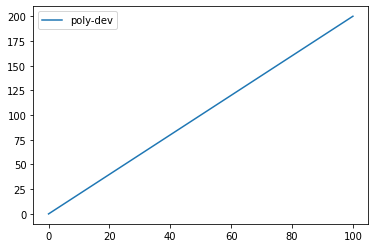

In [269]:
# plt.plot(x, 2*x - lderivative(f,x), label="ldev")
# plt.plot(x, -2*x + rderivative(f,x), label="rdev")
# plt.plot(x, 2*x - derivative(f,x, 1e-6), label="dev")
plt.plot(x, f.derivative()(x), label="poly-dev")
plt.legend()
plt.show()

In [29]:
( 2*x - derivative(f,x, 1e-6)).mean()

2.1879380774151962e-07

In [4]:
lderivative(f, 2), rderivative(f, 2), derivative(f, 2)

(3.999998999582033, 4.0000010006480125, 4.000000000115023)

In [188]:
class Function:
    pass

In [308]:
class RationalPoly(Function):
    def __init__(self,oblique:Polynomial ,numerator:Polynomial, denominator:Polynomial):
        self.num_poly = numerator
        self.denom_poly = denominator
        self.obl_poly = oblique
    def __call__(self, x:float)->float:
        denom = self.denom_poly(x)
        if denom == 0: denom = 1e-6
        return self.obl_poly(x) + self.num_poly(x)/denom
    def __repr__(self):
        return f'({self.obl_poly}) + [{self.num_poly}] / [{self.denom_poly}]'
    def __add__(self, f):
        if isinstance(f, (int, float, Polynomial)):
            return RationalPoly(self.obl_poly + f, self.num_poly, self.denom_poly)
    def derivative(self):
        obl = self.obl_poly.derivative()
        num = self.denom_poly * self.num_poly.derivative() - self.num_poly * self.denom_poly.derivative()
        denom = self.denom_poly * self.denom_poly
        return num/denom + obl


In [307]:
RationalPoly(Polynomial([0]),p,q)

(0) + [x^4 + x^2] / [2x^1]

In [303]:
class Polynomial(Function):
    def __init__(self, coeff:list[float], reverse=True)->None:
        self.coeff = coeff[::-1] if reverse else coeff
        self.degree = len(coeff) -1
    def __getitem__(self, r):
        if 0<=r<= self.degree:
            return self.coeff[r]
        else:
            return 0
    def __setitem__(self, r, r_c):
        if 0<=r<= self.degree:
            self.coeff[r] = r_c
        else:
            pass

    def __add__(self, p:Polynomial):
        if isinstance(p, (int, float)):
            res = Polynomial(self.coeff[::-1])
            res[0] += p
            return res

        coeff = [0]*(max(self.degree, p.degree)+1)
        res = Polynomial(coeff, reverse=False)
        for i in range(len(coeff)):
            res[i] = self[i] + p[i]
        return res

    def __sub__(self, p:Polynomial):
        if isinstance(p, (int, float)):
            res = Polynomial(self.coeff[::-1])
            res[0] -= p
            return res
            
        coeff = [0]*(max(self.degree, p.degree)+1)
        res = Polynomial(coeff, reverse=False)
        for i in range(len(coeff)):
            res[i] = self[i] - p[i]
        return res

    def __mul__(self, p:Polynomial):
        if isinstance(p, (int, float)):
            coeff = [p*c for c in self.coeff]
            res = Polynomial(coeff, reverse=False)
            return res
            
        coeff = [0]*(self.degree + p.degree + 1)
        res = Polynomial(coeff, reverse=False)
        for i in range(self.degree + 1):
            for j in range(p.degree + 1):
                res[i + j] += self[i] * p[j]
        return res

    def __div__(self, p:Polynomial):
        if isinstance(p, (int, float)):
            coeff = [c/p for c in self.coeff]
            res = Polynomial(coeff, reverse=False)
            return res
        res = RationalPoly(Polynomial([0]*max(self.degree - p.degree + 1, 1)), self, p)
        numd = self.degree
        denomd = p.degree
        if self.degree >= p.degree:
            

        coeff = [0]*(self.degree + p.degree + 1)
        res = Polynomial(coeff, reverse=False)
        for i in range(self.degree + 1):
            for j in range(p.degree + 1):
                res[i + j] += self[i] * p[j]
        return res


    def __call__(self, x:float)->float:
        ans = 0
        xp=1
        for c in self.coeff:
            ans = ans + c*xp
            xp = xp * x
        return ans
        
    def derivative(self):
        coeff = [(r+1)*c for r, c in enumerate(self.coeff[1:])]
        return Polynomial(coeff, reverse=False)

    def __repr__(self):
        return self.__str__()
        # return ' + '.join([f'{c}x^{r}' for r, c in enumerate(self.coeff) if c!= 0])

    def __str__(self):
        if self.degree == 0: return f'{self.coeff[0]}'
        rep = ''
        for r, c in enumerate(self.coeff):
            sign = '+' if c>0 else '-'
            if c!=0:
                c_abs = abs(c)
                c_abs = '' if (c_abs == 1 and r>0) else f'{c_abs}'
                base = f'x^{r}' if r>0 else ''
                if r==self.degree and sign=='+':sign=''
                rep = f' {sign} {c_abs}{base}' + rep
        return rep.lstrip()
    def newton(self, x0, iteration=1):
        x=[x0]
        obj = self.derivative()
        for i in range(iteration):
            deriv = obj(x[i])
            if deriv ==0: deriv = 1e-6
            x.append(x[i] - self(x[i])/deriv)
        return x

In [295]:
p = Polynomial([1,0,1,0,0])
q = Polynomial([2,0])

In [296]:
p * q, p, q

(2x^5 + 2x^3, x^4 + x^2, 2x^1)

In [183]:
pn100 = p.revnewton(-5,100)
pn100[-1]

-0.16195230542946382

In [184]:
pn100 = np.array(pn100)

In [185]:
pn100 = pn100[1:] - pn100[:-1]

In [186]:
pn100c = (pn100[1:])/(pn100[:-1])

In [187]:
pn100c

array([  0.22383621,  -0.68192411, -24.80913914,  -0.99254   ,
         0.17108981,  -0.80208916,   0.34539848,  -1.25922079,
        -0.6798433 , -31.19449209,  -0.99525854,   0.16946133,
        -0.86040678,   0.27682584,  -0.96012553,  -1.10845874,
        -0.81128992,  -2.06725945,  -0.6034561 ,   0.95892724,
        -0.87388942,  -1.49333224,  -0.60072584,   2.60179102,
        -0.64840378,   0.68526505,  -1.23484106,  -0.69492311,
       -11.03834834,  -0.96400042,   0.18937007,  -0.587768  ,
         1.22628878,  -0.68561925, -18.24310844,  -0.98634614,
         0.17487199,  -0.70778339,   0.508809  ,  -1.45685867,
        -0.60742805,   3.02025929,  -0.69471252,   0.54009735,
        -1.43348142,  -0.6125626 ,   3.38578002,  -0.73203921,
         0.45784607,  -1.46289771,  -0.6062124 ,   2.94017203,
        -0.68604011,   0.56269504,  -1.40996841,  -0.618465  ,
         3.87686914,  -0.7752569 ,   0.38366656,  -1.3684255 ,
        -0.63093631,   5.3285843 ,  -0.8614664 ,   0.27

In [333]:
import random


In [385]:
X = [random.random() for _ in range(10000)]
X = np.array(X)
F = lambda x: (X < x).mean()
x = np.linspace(0,1,200)
y = np.array([F(a) for a in x])

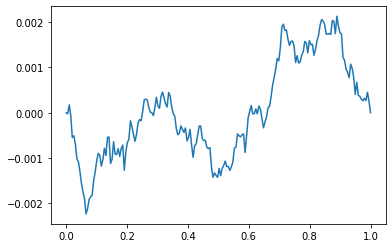

In [386]:
plt.plot(x,u)
# plt.plot(x,x)

In [387]:
u = (n * u + y - x)/(n+1)
n = n + 1